<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject #3</div>
<span style="">MicroProject: A DataFrame of Your Weather Forecast</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/03-random-weather-forecast/">https://discovery.cs.illinois.edu/microproject/03-dataframe-weather-forecast/</a></div>
</h1>

<hr style="color: #DD3403;">

## Data API: National Weather Service (NWS) Weather Forecast

The National Weather Service allows, for free, "developers access to critical forecasts, alerts, and observations, along with other weather data."  You can find the full documentation of their API at: [https://www.weather.gov/documentation/services-web-api](https://www.weather.gov/documentation/services-web-api).

Since weather data is based on your location, you need to find the latitude and longitude of coordinate of your location!

- One quick way to do this is to pull up [Google Maps](https://maps.google.com/) and **right click** on a location.
- The first option will be the `latitude, longitude` of the location of your click on the map.  You can click it to copy it to your clipboard!

Once you have your location, add each component to a variable below:

In [92]:
latitude = 40.1020
longitude = -88.2272

### Finding Your Forecast Area

The National Weather Service API provides a `/points/` endpoint that uses the `latitude,longitude` value to return a weather forecast.  The full URL for this endpoint is in the following format:

```
https://api.weather.gov/points/LATITUDE,LONGITUDE
```

This endpoint also returns a JSON that can only be read in a `typ="series"` format.

- Using pandas, use `pd.read_json` to read the weather for your location.
- Make sure to replace `LATITUDE` and `LONGITUDE` with your actual latitude and longitude.
- As part of `read_json`, make sure to include `typ="series"`.
- For example: `pd.read_json(..., typ="series")`.

Store the result in a variable named `pointsJSON`:

In [93]:
import pandas as pd
pointsJSON = pd.read_json("https://api.weather.gov/points/40.1020,-88.2272", typ = "series")
pointsJSON

@context      [https://geojson.org/geojson-ld/geojson-contex...
id            https://api.weather.gov/points/40.1019999,-88....
type                                                    Feature
geometry      {'type': 'Point', 'coordinates': [-88.2272, 40...
properties    {'@id': 'https://api.weather.gov/points/40.101...
dtype: object

### Finding Your Forecast URL

The JSON you just loaded has multiple fields including two fields with data:

- `geometry`, which include the geometric area for the result (you supplied a single point, but weather forecasts are given for areas that can be many square miles)
- `properties`, which includes all properties about the location you requested

You can inspect the data further by running `pointsJSON["geometry"]` or `pointsJSON["properties"]`.  Inspect the **properties** and look for the URL that provides the **hourly forecast**.


In [94]:
pointsJSON["properties"]

{'@id': 'https://api.weather.gov/points/40.1019999,-88.2272',
 '@type': 'wx:Point',
 'cwa': 'ILX',
 'forecastOffice': 'https://api.weather.gov/offices/ILX',
 'gridId': 'ILX',
 'gridX': 95,
 'gridY': 71,
 'forecast': 'https://api.weather.gov/gridpoints/ILX/95,71/forecast',
 'forecastHourly': 'https://api.weather.gov/gridpoints/ILX/95,71/forecast/hourly',
 'forecastGridData': 'https://api.weather.gov/gridpoints/ILX/95,71',
 'observationStations': 'https://api.weather.gov/gridpoints/ILX/95,71/stations',
 'relativeLocation': {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [-88.197323, 40.110126]},
  'properties': {'city': 'Urbana',
   'state': 'IL',
   'distance': {'unitCode': 'wmoUnit:m', 'value': 2696.8543849426},
   'bearing': {'unitCode': 'wmoUnit:degree_(angle)', 'value': 250}}},
 'forecastZone': 'https://api.weather.gov/zones/forecast/ILZ045',
 'county': 'https://api.weather.gov/zones/county/ILC019',
 'fireWeatherZone': 'https://api.weather.gov/zones/fire/ILZ045',


### Record Your Forecast URL

Finally, record the URL that you can use to find the hourly forecast for your location:

In [95]:
hourlyForecastURL = "https://api.weather.gov/gridpoints/ILX/95,71/forecast/hourly"
hourlyForecastURL

'https://api.weather.gov/gridpoints/ILX/95,71/forecast/hourly'

<hr style="color: #DD3403;">

## Puzzle 1: Loading Your Weather Forecast as a DataFrame

In the same way as you did in the beginning of this MicroProject, use the hourlyForecastURL and `pd.read_json` to load the your weather forecast.  Store your result in the variable `forecastJSON`:

In [96]:
forecastJSON = pd.read_json("https://api.weather.gov/gridpoints/ILX/95,71/forecast/hourly", typ = "series")
forecastJSON

@context      [https://geojson.org/geojson-ld/geojson-contex...
type                                                    Feature
geometry      {'type': 'Polygon', 'coordinates': [[[-88.2476...
properties    {'updated': '2022-09-23T00:39:47+00:00', 'unit...
dtype: object

### Finding the Forecast Data

Inside of the `properties` data within `forecastJSON`, the `periods` data provides a **well-defined, structured** set of data that contains the forecast for every hour for your location.

Check out how it looks in the raw form:

In [97]:
forecastJSON["properties"]["periods"]

[{'number': 1,
  'name': '',
  'startTime': '2022-09-22T19:00:00-05:00',
  'endTime': '2022-09-22T20:00:00-05:00',
  'isDaytime': False,
  'temperature': 59,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'windSpeed': '8 mph',
  'windDirection': 'NNE',
  'icon': 'https://api.weather.gov/icons/land/night/bkn?size=small',
  'shortForecast': 'Mostly Cloudy',
  'detailedForecast': ''},
 {'number': 2,
  'name': '',
  'startTime': '2022-09-22T20:00:00-05:00',
  'endTime': '2022-09-22T21:00:00-05:00',
  'isDaytime': False,
  'temperature': 55,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'windSpeed': '7 mph',
  'windDirection': 'NNE',
  'icon': 'https://api.weather.gov/icons/land/night/sct?size=small',
  'shortForecast': 'Partly Cloudy',
  'detailedForecast': ''},
 {'number': 3,
  'name': '',
  'startTime': '2022-09-22T21:00:00-05:00',
  'endTime': '2022-09-22T22:00:00-05:00',
  'isDaytime': False,
  'temperature': 53,
  'temperatureUnit': 'F',
  'temperatureTrend': None,


### Loading the Data at a DataFrame

Since we have **clean, structured data**, we can read it into pandas!  The code below creates a DataFrame out of the above data by using the `pd.DataFrame` command:

In [98]:
df = pd.DataFrame(forecastJSON["properties"]["periods"])
df

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,windSpeed,windDirection,icon,shortForecast,detailedForecast
0,1,,2022-09-22T19:00:00-05:00,2022-09-22T20:00:00-05:00,False,59,F,None,8 mph,NNE,https://api.weather.gov/icons/land/night/bkn?s...,Mostly Cloudy,
1,2,,2022-09-22T20:00:00-05:00,2022-09-22T21:00:00-05:00,False,55,F,None,7 mph,NNE,https://api.weather.gov/icons/land/night/sct?s...,Partly Cloudy,
2,3,,2022-09-22T21:00:00-05:00,2022-09-22T22:00:00-05:00,False,53,F,None,7 mph,NE,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,
3,4,,2022-09-22T22:00:00-05:00,2022-09-22T23:00:00-05:00,False,51,F,None,6 mph,NE,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,
4,5,,2022-09-22T23:00:00-05:00,2022-09-23T00:00:00-05:00,False,51,F,None,6 mph,NE,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,,2022-09-29T02:00:00-05:00,2022-09-29T03:00:00-05:00,False,48,F,None,5 mph,E,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,
152,153,,2022-09-29T03:00:00-05:00,2022-09-29T04:00:00-05:00,False,47,F,None,3 mph,E,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,
153,154,,2022-09-29T04:00:00-05:00,2022-09-29T05:00:00-05:00,False,46,F,None,3 mph,E,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,
154,155,,2022-09-29T05:00:00-05:00,2022-09-29T06:00:00-05:00,False,45,F,None,3 mph,E,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,


<hr style="color: #DD3403;">

## Puzzle 2: Exploring Your Weather

Now that you have the weather forecast for **your location** loaded into the DataFrame `df`, it's time to nerd out with it!

### Your Warmest Upcoming Temperature

Using your data, find the warmest temperature in the entire forecast!  Save that row as `df_warmest`:

In [99]:
df_warmest = df.nlargest(1, "temperature")
df_warmest

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,windSpeed,windDirection,icon,shortForecast,detailedForecast
45,46,,2022-09-24T16:00:00-05:00,2022-09-24T17:00:00-05:00,True,78,F,None,10 mph,WSW,https://api.weather.gov/icons/land/day/few?siz...,Sunny,


### Your Coldest Upcoming Temperature

Using your data, find the coldest temperature in the entire forecast!  Save that row as `df_coldest`:

In [100]:
df_coldest = df.nsmallest(1, "temperature")
df_coldest

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,windSpeed,windDirection,icon,shortForecast,detailedForecast
132,133,,2022-09-28T07:00:00-05:00,2022-09-28T08:00:00-05:00,True,44,F,None,5 mph,N,https://api.weather.gov/icons/land/day/few?siz...,Sunny,


### Hours of Sky Conditions

The `shortForecast` column provides a brief summary of the forecasted condition of the sky for each hour.  Create a DataFrame that contains a summary of upcoming sky conditions in only two columns:

- `shortForecast`, and
- `count`, containing the number of times that `shortForecast` appears in the forecast

Save the summary in the `skySummary` variable:

In [101]:
skySummary = df["shortForecast"].value_counts().reset_index()
addcolumns_skySummary = skySummary.rename(columns = {"index": "shortForecast", "shortForecast": "count"}) # Changes the column labeled 'index' to 'shortForecast and the column labeled 'shortForeCast' to 'count'
skySummary = addcolumns_skySummary
skySummary


,shortForecast,count
0,Mostly Clear,51
1,Sunny,46
2,Mostly Cloudy,14
3,Slight Chance Rain Showers,12
4,Partly Cloudy,11
5,Mostly Sunny,6
6,Partly Sunny,6
7,Chance Rain Showers,6
8,Clear,4


<hr style="color: #DD3403;">

## Puzzle 3: Create a Scatter Plot

Finally, let's create a scatter plot of your forecast!

Using `df.plot.scatter`, you must specify the `x` column name and `y` column name for your scatter plot to use the command:

```
df.plot.scatter(x="x-column", y="y-column")
```

Using your weather forecast:

- Use the starting date of the forecast as your `x` value,
- Use the temperature as your `y` value,
- Create your scatter plot! :)

<AxesSubplot:xlabel='startTime', ylabel='temperature'>

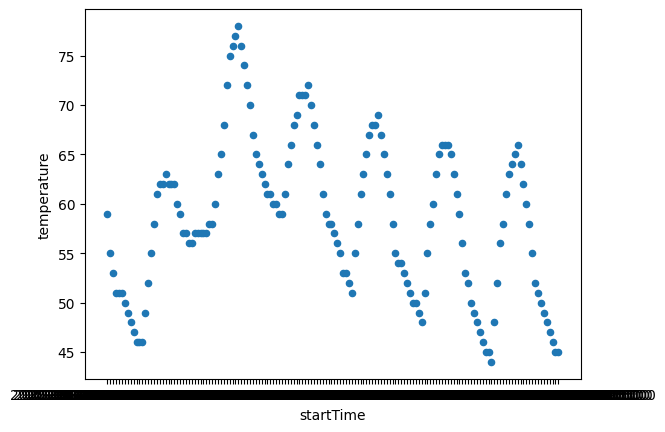

In [102]:
df.plot.scatter(x = "startTime", y = "temperature")

<hr style="color: #DD3403;">

## 🔬 Microproject Checkpoint Tests 🔬

In [103]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for the microproject.
# - If this cell runs without any error in the output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cells, make changes, and RE-RUN your code and then this cell.
tada = "\N{PARTY POPPER}"

assert("/points/" in pointsJSON["id"])
assert(f"/{int(latitude)}" in pointsJSON["id"])
assert(f",{int(longitude)}" in pointsJSON["id"])
assert("/gridpoints/" in hourlyForecastURL)
assert("/forecast/hourly" in hourlyForecastURL)
print(f"{tada} Data API: All Tests Passed! {tada}")


assert("df" in vars())
assert("startTime" in df)
assert("temperature" in df)
print(f"{tada} Puzzle 1: All Tests Passed! {tada}")


assert( len(df_warmest) == 1 )
assert( df_warmest["temperature"].values[0] == max(df["temperature"]) )

assert( len(df_coldest) == 1 )
assert( df_coldest["temperature"].values[0] == min(df["temperature"]) )

assert( len(skySummary) == len(df["shortForecast"].unique()) )
pd.testing.assert_frame_equal(skySummary.sort_values("shortForecast").sort_values("count").set_index("shortForecast"), pd.DataFrame(df["shortForecast"].value_counts()).reset_index().rename({"index": "shortForecast", "shortForecast": "count"}, axis=1).sort_values("shortForecast").sort_values("count").set_index("shortForecast"))
print(f"{tada} Puzzle 2: All Tests Passed! {tada}")

print(f"{tada}{tada} All Tests Passed! {tada}{tada}")

🎉 Data API: All Tests Passed! 🎉
🎉 Puzzle 1: All Tests Passed! 🎉
🎉 Puzzle 2: All Tests Passed! 🎉
🎉🎉 All Tests Passed! 🎉🎉


<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the instructions to commit and grade this MicroProject!
